In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from reframed import load_cbmodel

In [3]:
df = pd.read_csv('../results/results_local.tsv', sep='\t', na_values='None')
df = df.dropna().query('test == "LP"')

In [4]:
models = {x: load_cbmodel(f'../models/{x}.xml.gz', flavor='bigg') for x in set(df['model'])}
lp_sizes = {x: len(models[x].reactions) for x in models}
df['size_lp'] = df['model'].apply(lambda x: lp_sizes[x])

In [5]:
solver_name = {
    'CPLEX_PY': 'cplex',
    'GUROBI': 'gurobi',
    'SCIP_CMD': 'scip',
    'HiGHS_CMD': 'highs',
    'GLPK_CMD': 'glpk',
    'COIN_CMD': 'coin-or',

}
df['solver'] = df['interface'].apply(lambda x: solver_name[x])

In [6]:
df2 = pd.read_csv('../results/community_simulation.csv')
df2['solver'] = df2['interface'].apply(lambda x: solver_name[x])

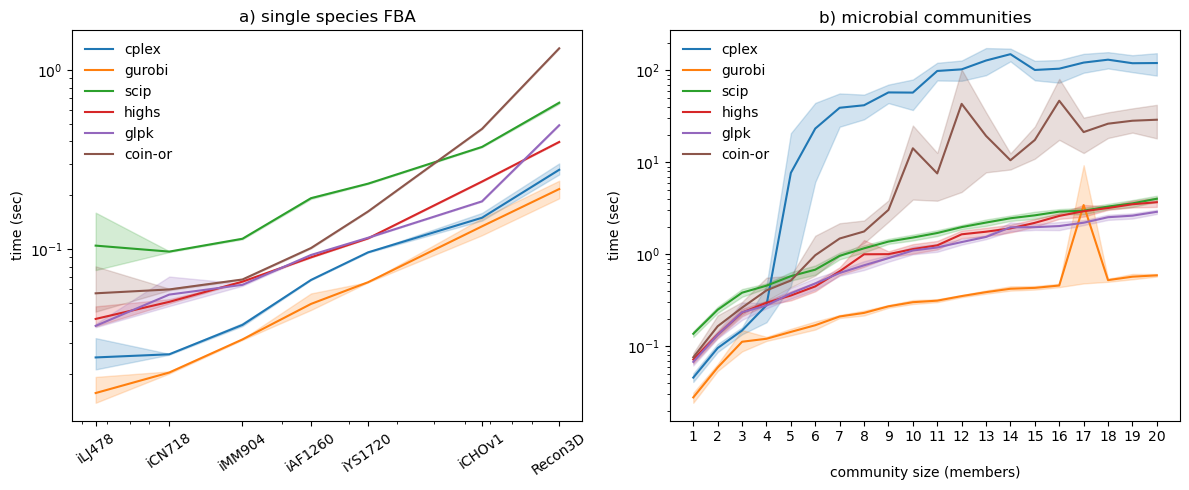

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=df.dropna().query('test == "LP"'), x="size_lp", y="time", hue="solver",  ax=ax1)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks(list(lp_sizes.values()))
ax1.set_xticklabels(list(lp_sizes.keys()), rotation=35)
ax1.set_xlabel('')
ax1.set_ylabel('time (sec)')
ax1.legend(loc=2, frameon=False)
ax1.set_title('a) single species FBA')

sns.lineplot(data=df2, x="size", y="time", hue="solver", ax=ax2)

ax2.set_yscale('log')
ax2.set_xticks(range(1,21))
ax2.set_xlabel('\ncommunity size (members)')
ax2.set_ylabel('time (sec)')
ax2.legend(loc=2, frameon=False)
ax2.set_title('b) microbial communities')

f.tight_layout()
f.savefig('../figures/results_lp.png', dpi=300)